<a href="https://colab.research.google.com/github/jonshiach/Outreach/blob/main/fractals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://raw.githubusercontent.com/jonshiach/Outreach/main/Images/MMU_logo.png" width=150 align="right"/>
<img src="https://raw.githubusercontent.com/jonshiach/Outreach/main/Images/python_logo.png" width="150" align="right"/>

# Fractals

---
<table align="center">
    <tr>
        <td align="left">
            <span style="font-weight:normal">
                <b>Dr Jon Shiach</b> <br><br>
                Senior Lecturer <br>
                Department of Computing and Mathematics<br>
                Manchester Metropolitan University<br> 
                Email: <a href="mailto:j.shiach@mmu.ac.uk">j.shiach@mmu.ac.uk</a>
            </span>
        </td>
        <td>
            <img width="100" src="https://raw.githubusercontent.com/jonshiach/Outreach/main//Images/jon_shiach.jpeg">
        </td>
        <td align="left">
            <span style="font-weight:normal">
                <b>Dr Stephen Lynch</b> <br><br> 
                Reader <br> 
                Department of Computing and Mathematics<br>
                Manchester Metropolitan University<br>
                Email: <a href="mailto:s.lynch@mmu.ac.uk">s.lynch@mmu.ac.uk</a>
            </span>
        </td>
        <td>
            <img width="100" src="https://raw.githubusercontent.com/jonshiach/Outreach/main//Images/stephen_lynch.jpeg">
        </td>
        <td>
            <span style="font-weight:normal">
                <b>Dr Killian O'Brien</b> <br><br>
                Senior Lecturer <br>
                Department of Computing and Mathematics<br>
                Manchester Metropolitan University<br> 
                Email: <a href="mailto:k.m.obrien@mmu.ac.uk">k.m.obrien@mmu.ac.uk</a>
            </span>
        </td>
        <td>
            <img width="100" src="https://raw.githubusercontent.com/jonshiach/Outreach/main//Images/killian_obrien.jpeg">
        </td>
    </tr>
</table>

---


## Introduction

[**Fractals**](https://en.wikipedia.org/wiki/Fractal) are complex and beautiful shapes that are generated using a simple set of mathematical rules. Fractals often exhibit a complicated structure which is repeated at different scales throughout the fractal, this means that if we zoom in on a portion of the fractal it will resemble the fractal itself. Mathematicians refer to this property as **self similarity** and can be seen in nature, some examples of which are shown below.

| <img src="https://raw.githubusercontent.com/jonshiach/Outreach/main//Images/cactus.jpeg" width="300"/> | <img src="https://raw.githubusercontent.com/jonshiach/Outreach/main//Images/lightning.jpeg" width="300"/> |<img src="https://raw.githubusercontent.com/jonshiach/Outreach/main//Images/snowflake.jpeg" width="300"/> |<img src="https://raw.githubusercontent.com/jonshiach/Outreach/main//Images/lungs.jpeg" width="300"/> |
|:--:|:--:|:--:|:--:|
| Cactus | Electricity | Snowflake | Lungs |
         
This Jupyter notebook will introduce you to fractals and how we can draw fractals using [Python](https://www.python.org/). To be able to follow the content of this notebook you just need an understanding of basic trigonometry, geometry and complex numbers (which are covered here). You will be asked to enter Python programs into code cells and run the programs. Typing the programs into the code cells will help you to understand what the program is doing, but if this gets tedious you can also copy and paste the programs into the code cells. 

### Jupyter notebooks

Jupyter notebooks are documents that combine text and Python code which allow readable documents such as this one to be created that contain executable code used to perform calculations. To run code in a notebook simply click on the code and then on the run button, or alternatively, press the **ctrl + enter** keys at the same time. Since we will be using commands to perform calculations and produce plots of fractals we need to import some commands to help us to do this. Run the code below to import the commands.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm, colors
plt.rcParams['figure.figsize'] = [10, 8]

These commands import the Numpy (short for *Numerical Python*) and matplotlib libraries which enable us to perform numerical calculations and produce plots of our fractals.

Now that we have imported these libraries we can perform some calculations. The Python code below calculates the length of the side of the right-angled triangle opposite the angle $\theta = 0.6435$ and with a hypotenuse of length 5 and prints the result. Note how the equation $\textsf{opposite}=5\sin(0.6435)$  is entered in a similar way to how we write it on a piece of paper. Can you add a couple of lines of code to calculate the length of the adjacent side as well?

In [2]:
opposite = 5 * np.sin(0.6435)
print(opposite)

2.999995564825018


---
## The Koch Curve

The [**Koch Curve**](https://en.wikipedia.org/wiki/Koch_snowflake) first discovered by Swedish mathematician Helge von Koch is one of the first examples of a fractal. To draw a Koch curve we begin with a straight line of length $L$ (the initial starting point is known as stage 0). We then remove the middle third of the line and replace it with two lines of length $\frac{L}{3}$ which form two sides of an equilateral triangle. So after the first time we do this (stage 1) we have four lines each of length $\frac{L}{3}$. We then repeat the process for each of the new lines.

<img src="https://raw.githubusercontent.com/jonshiach/Outreach/main//Images/koch_curve.svg" align=center width=800>

The Python program below defines a function called `kochCurve` which uses inputs of the starting co-ordinates `x1` and `y1`, the length of the line `L`, the angle of the line `angle` and the number of stages `n`. Run the code cell to see the result.

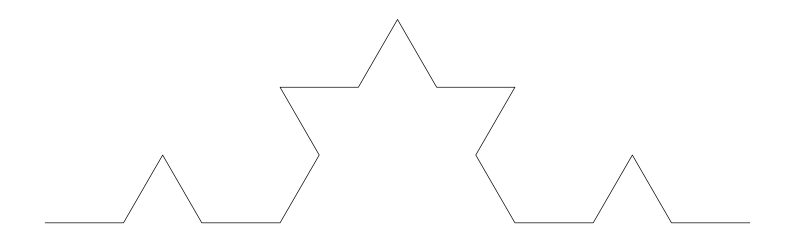

In [64]:
# This is a code cell which we can write Python programs. 
# Enter the program here and then run the code cell by clicking on 'Run' or press ctrl and enter.

import matplotlib.pyplot as plt

def kochCurve(x, y, L, angle, n):
    if n == 0:
        # Add the end point co-ordinates to x and y
        x.append(x[-1] + L * np.cos(np.radians(angle)))
        y.append(y[-1] + L * np.sin(np.radians(angle)))
    if n > 0:
        L = L / 3;
        kochCurve(x, y, L, angle, n - 1)      # add line
        kochCurve(x, y, L, angle + 60, n - 1) # turn 60 degrees to the left and add line
        kochCurve(x, y, L, angle - 60, n - 1) # turn 60 degrees to the right and add line
        kochCurve(x, y, L, angle, n - 1)      # add line


# Generate Koch curve
initialLength = 1;
initialAngle = 0;
numberStages = 2;
x, y = [0], [0]
kochCurve(x, y, initialLength, initialAngle, numberStages)

# Plot curve
fig, ax = plt.subplots()
plt.plot(x, y, color="black", linewidth=0.5)
ax.axis("off")
ax.set_aspect("equal")

If everything has gone well you should see the Koch curve drawn to stage 2. Can you edit the program to draw the Koch curve up to stage 4?

### The Koch snowflake

The **Koch snowflake** is a fractal that is constructed using a Koch curve to each side of an equilateral triangle.

<img src="https://raw.githubusercontent.com/jonshiach/Outreach/main//Images/koch_snowflake.svg" align=center width=600>

The Python code below uses our `kochCurve` function that we defined above to draw a Koch snowflake.

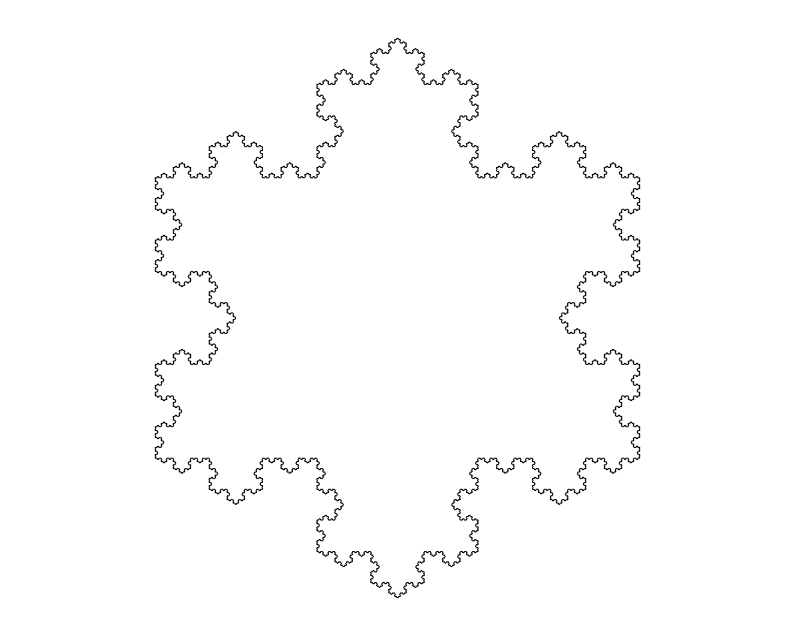

In [7]:
# Generate the Koch snowflake
initialLength = 1
initialAngle = 0
numberStages = 6
x, y = [0], [0]
kochCurve(x, y, initialLength, initialAngle, numberStages)
kochCurve(x, y, initialLength, initialAngle + 240, numberStages)
kochCurve(x, y, initialLength, initialAngle + 120, numberStages)

# Plot curve
fig, ax = plt.subplots()
plt.plot(x, y, color="black", linewidth=0.5)
plt.axis("equal")
plt.axis("off")
plt.show()

---
### Activity 1: The Koch square

A variation on the Koch snowflake is the **Koch Square** which is where each line of a square has the middle third removed and replaced by three lines which form three sides of a square with side length one third of that of the line we started with. Amend the program below by replacing the `????` with commands so that is can draw the Koch square.

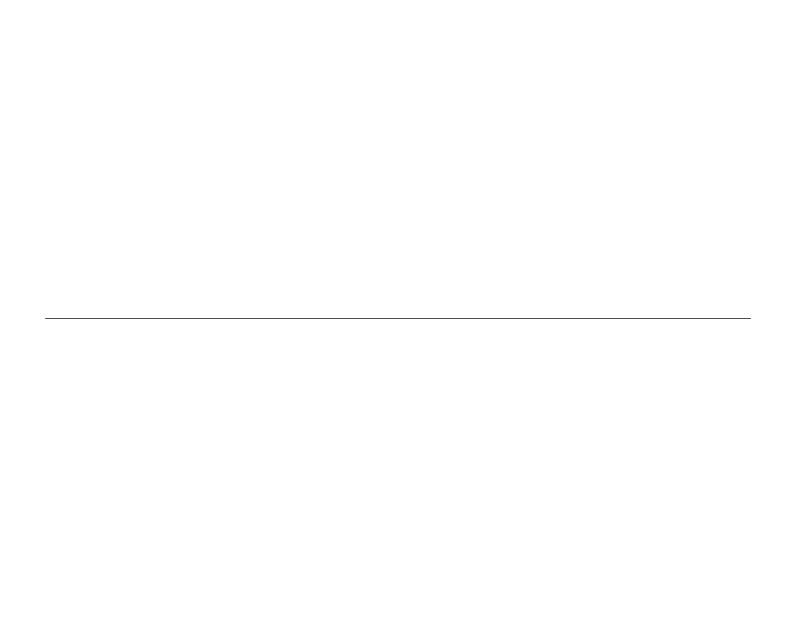

In [59]:
def kochSquare(x, y, L, angle, n):
    if n == 0:
        # Add the end point co-ordinates to x and y
        x.append(x[-1] + L * np.cos(np.radians(angle)))
        y.append(y[-1] + L * np.sin(np.radians(angle)))
    if n > 0:
        L = L / 3;                     # divide length of line by 3
        kochSquare(x, y, L, angle, n - 1)      # add first line
        # kochSquare(x, y, L, ????, n - 1)      # add second line
        # kochSquare(x, y, L, ????, n - 1)      # add third line
        # kochSquare(x, y, L, ????, n - 1)      # add fourth line


# Generate the Koch snowflake
initialLength = 1
initialAngle = 0
numberStages = 6
x, y = [0], [0]
kochSquare(x, y, initialLength, initialAngle, numberStages)     # add top kochSquare curve
# kochSquare(x, y, initialLength, ????, numberStages)             # add right-hand side kochSquare curve
# kochSquare(x, y, initialLength, ????, numberStages)             # add bottom kochSquare curve
# kochSquare(x, y, initialLength, ????, numberStages)             # add left-hand side kochSquare curve

# Plot curve
fig, ax = plt.subplots()
plt.plot(x, y, color="black", linewidth=0.5)
plt.axis("equal")
plt.axis("off")
plt.show()

---
## The Sierpinski Triangle

The [**Sierpinski Triangle**](https://en.wikipedia.org/wiki/Sierpi%C5%84ski_triangle) was discovered by Polish mathematician Wacław Sierpiński and is drawn by starting with a filled equilateral triangle at stage 0. We then remove the inverted equilateral triangle with the vertices at the midpoints along the edges of the triangle. We repeat this for each new triangle.

<img src="https://raw.githubusercontent.com/jonshiach/Outreach/main//Images/sierpinski_triangle.svg" align=center width=500>

<br>

<img src="https://raw.githubusercontent.com/jonshiach/Outreach/main//Images/sierpinski_triangle_calculation.svg" align=right width=250>

If the initial triangle has side lengths 1 then the co-ordinates of the three vertices anti-clockwise starting at the bottom-left vertex are $(0, 0)$, $(1, 0)$ and $( \frac{1}{2}, \frac{\sqrt{3}}{2} )$. The vertices of the inverted triangle are labeled $(x_1, y_1)$, $(x_2, y_2)$ and $(x_3, y_3)$ going anti-clockwise starting at the bottom vertex as shown in the diagram on the right. To calculate these co-ordinates we use the co-ordinates of the bottom-left vertex $(x, y)$ and the side length $L$ to give

\begin{align*}
    (x_1, y_1) &= \left(x + \frac{1}{2}L, y\right), &
    (x_2, y_2) &= \left(x + \frac{3}{4}L, y + \frac{\sqrt{3}}{4}L\right), &
    (x_3, y_3) &= \left(x + \frac{1}{4}L, y + \frac{\sqrt{3}}{4}L\right).
\end{align*}

The three smaller triangles are defined by the co-ordinates of the bottom-left vertex which are $(x, y)$, $(x_1, y_1)$ and $(x_3, y_3)$ and the side length one-third of the current triangle. The Python program below plots the Sierpinski triangle to stage 2. Edit the program to generate the Sierpinski triangle using more stages.  

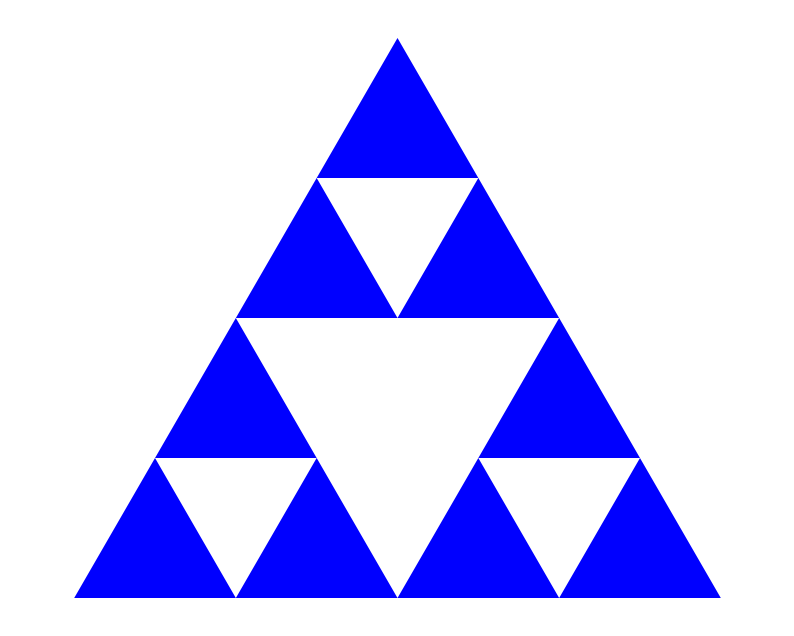

In [66]:
def sierpinskiTriangle(x, y, L, n):
    # Calculate co-ordinates of the inverted triangle
    x1 = x + 1/2 * L
    x2 = x + 3/4 * L
    x3 = x + 1/4 * L
    y1 = y
    y2 = y + np.sqrt(3) / 4 * L
    y3 = y2 
    
    # Plot inverted triangle
    plt.fill([x1, x2, x3], [y1, y2, y3], facecolor="white")
    
    # Repeat for each sub-triangle
    if n > 1:
        L = L / 2
        sierpinskiTriangle(x, y, L, n - 1)     # bottom left triangle
        sierpinskiTriangle(x1, y1, L, n - 1)   # bottom right triangle
        sierpinskiTriangle(x3, y3, L, n - 1)   # top triangle


# Plot stage 0 triangle
initialLength = 1
fig, ax = plt.subplots()
plt.fill([0, initialLength, initialLength / 2], [0, 0, np.sqrt(3) / 2], facecolor="blue")
plt.axis("equal")
plt.axis("off")

# Generate Sierpinsky triangle
numberStages = 2
sierpinskiTriangle(0, 0, initialLength, 2)
plt.show()

---
### Activity 2: The Sierpinski carpet

The [**Sierpinski carpet**](https://en.wikipedia.org/wiki/Sierpi%C5%84ski_carpet) is similar to the Sierpinski triangle but drawn by starting with a filled square at stage 0. We divide the square into 9 squares and remove the centre square. We repeat this step for each of the 8 filled squares of side lengths one third of the current square that remain. Amend the program below so that it can draw the Sierpinski carpet.

<img src="https://raw.githubusercontent.com/jonshiach/Outreach/main//Images/sierpinski_carpet.svg" align=center width=500>

Amend the program below by replacing `????` with appropriate commands so that it can draw the Sierpinsky carpet.

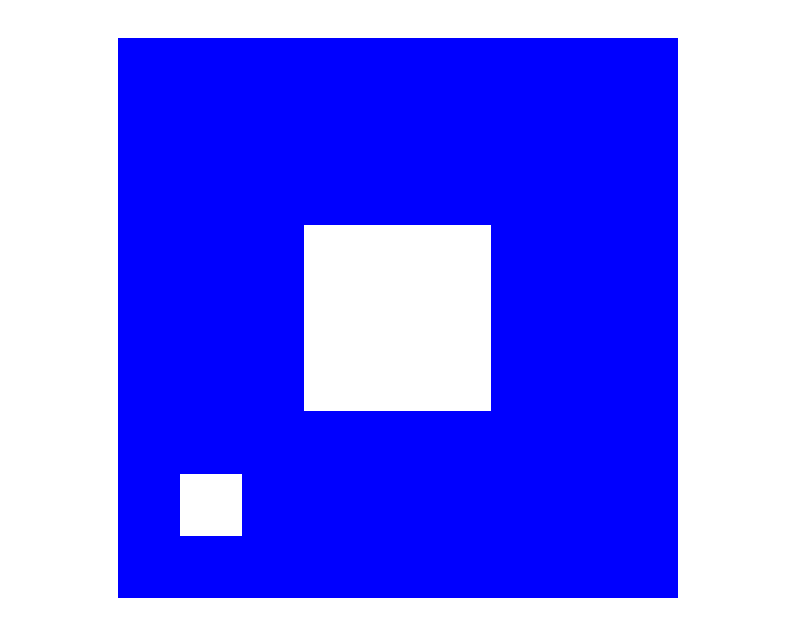

In [68]:
def sierpinskiCarpet(x, y, L, n):
    # Calculate co-ordinates of the inverted square
    x1 = x + 1/3 * L        # x co-ordinate of lower left corner of middle square
    y1 = y + 1/3 * L        # y co-ordinate of lower left corner of middle square
    x2 = x + 2/3 * L        # x co-ordinate of upper right corner of middle square
    y2 = y + 2/3 * L        # y co-ordinate of upper right corner of middle square
    
    # Plot inverted square
    plt.fill([x1, x2, x2, x1], [y1, y1, y2, y2], facecolor="white")
    
    # Repeat for each sub-square
    if n > 1:
        L = L / 3
        sierpinskiCarpet(x, y, L, n - 1)          # bottom left square
        # sierpinskiCarpet(????, ????, L, n - 1)    # bottom square
        # sierpinskiCarpet(????, ????, L, n - 1)    # bottom right square
        # sierpinskiCarpet(????, ????, L, n - 1)    # left square
        # sierpinskiCarpet(????, ????, L, n - 1)    # right square
        # sierpinskiCarpet(????, ????, L, n - 1)    # top left square
        # sierpinskiCarpet(????, ????, L, n - 1)    # top square
        # sierpinskiCarpet(????, ????, L, n - 1)    # top right square


# Plot stage 0 square
initialLength = 1
fig, ax = plt.subplots()
plt.fill([0, initialLength, initialLength, 0], [0, 0, initialLength, initialLength], facecolor="blue")
plt.axis("equal")
plt.axis("off")

# Generate Sierpinsky triangle
numberStages = 2
sierpinskiCarpet(0, 0, initialLength, numberStages)
plt.show()

---
## Fractal Trees

If you look at trees in nature you may now start to notice that they also have a fractal structure. A main trunk grows upwards until a point where it splits into two or more branches which will also grow for a bit before splitting again. This behaviour continues into the smallest branches begin to sprout leaves. We can attempt to draw a fractal that resembles a tree by doing something similar. 

The Python program below draws a fractal tree up to stage 4. Each branch of this tree splits into two smaller branches, the first branch is 50% of the length of the previous branch and grows at an angle 60 degrees to the left, the second branch is 70% the length of the previous branch and grows at an angle 30 degrees to the right. If we increase the number of stages we get a more detailed tree, although we wouldn't recommend going higher than stage 10 as this will take several minutes to run!

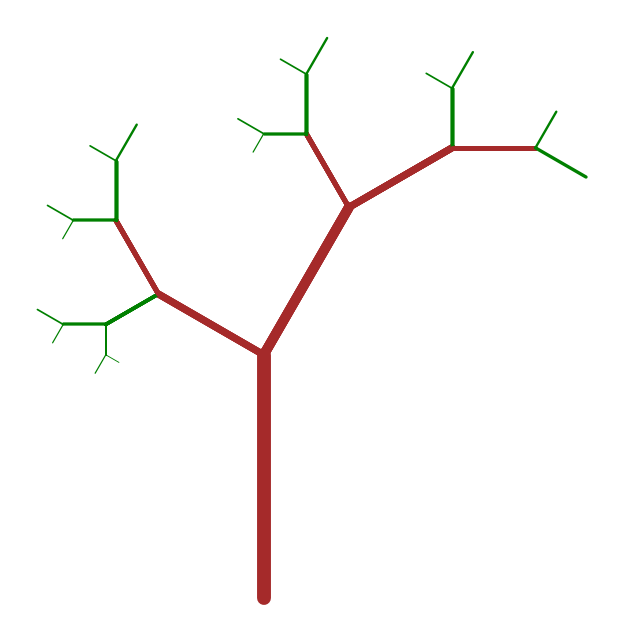

In [75]:
def tree(x1, y1, L, angle, n):
    # Calculate the end point of the current branch
    x2 = x1 + L * np.cos(np.radians(angle))
    y2 = y1 + L * np.sin(np.radians(angle))

    if n == 0:
        # Add current branch
        x.append([x1, x2])
        y.append([y1, y2])
        if L < 0.3:
            colour.append("green")
        else:
            colour.append("brown")    
        width.append(10 * L)
    else:
        # Add branches
        tree(x1, y1, L, angle, n - 1)             # main branch
        tree(x2, y2, 0.5 * L, angle + 60, n - 1)  # first branch (50% of the length and 60 degrees to the left)
        tree(x2, y2, 0.7 * L, angle - 30, n - 1)  # second branch (70% of the length and 30 degrees to the right)

    
# Generate fractal tree
initialAngle = 90
initialLength = 1
numStages = 4
x, y, colour, width = [], [], [], []
tree(0, 0, initialLength, initialAngle, numStages)

# Plot tree
fig, ax = plt.subplots()
for i in range(len(x)):
    plt.plot(x[i], y[i], color=colour[i], linewidth=width[i], solid_capstyle='round')

ax.axis("off")
ax.set_aspect("equal")

---
### Activity 3: Fractal tree

Amend the Python program below so that it draws a fractal tree where the branches split into three each time with the first branch growing straight up, the second branch growing at an angle of 15 degrees to the left and the third branch 15 degrees to the right and each sub-branch is 75% the length of the previous branch.

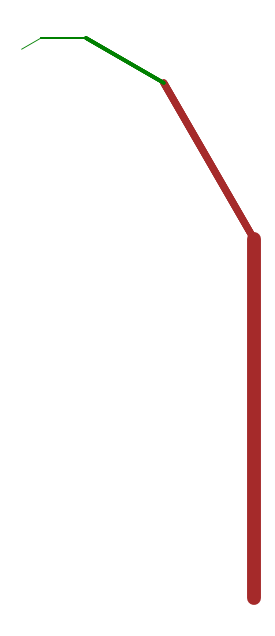

In [80]:
def tree(x1, y1, L, angle, n):
    # Calculate the end point of the current branch
    x2 = x1 + L * np.cos(np.radians(angle))
    y2 = y1 + L * np.sin(np.radians(angle))

    if n == 0:
        # Add current branch
        x.append([x1, x2])
        y.append([y1, y2])
        if L < 0.3:
            colour.append("green")
        else:
            colour.append("brown")    
        width.append(10 * L)
    else:
        # Add branches
        tree(x1, y1, L, angle, n - 1)       # main branch
        # tree(x2, y2, ????, ????, n - 1)     # first branch
        # tree(x2, y2, ????, ????, n - 1)     # second branch
        # tree(x2, y2, ????, ????, n - 1)     # second branch

    
# Generate fractal tree
initialAngle = 90
initialLength = 1
numStages = 4
x, y, colour, width = [], [], [], []
tree(0, 0, initialLength, initialAngle, numStages)

# Plot tree
fig, ax = plt.subplots()
for i in range(len(x)):
    plt.plot(x[i], y[i], color=colour[i], linewidth=width[i], solid_capstyle='round')

ax.axis("off")
ax.set_aspect("equal")

---
## The Mandlebrot Set

Perhaps the most famous and beautiful fractal is the [**Mandelbrot set**](https://en.wikipedia.org/wiki/Mandelbrot_set) which was discovered by Polish mathematician Benoit Mandelbrot who was the one who first coined the name *fractal*. The Mandelbrot set is generated by using a very simple formula that is applied to complex numbers, so before we look at how it is generated we are first going to introduce you to complex numbers.

### Complex numbers

<img align=right src="https://raw.githubusercontent.com/jonshiach/Outreach/main//Images/complex_plane.svg" align=center width=300>

Despite their name, complex numbers are actually quite simple. A complex number is a number that is expressed using two parts: a **real part** and an **imaginary part**. The real part is just a real number, the imaginary part is the **imaginary number** $i = \sqrt{-1}$ multiplied by a real number. For example, the complex number $z = x + yi$ has a real part $x$ and an imaginary part $y$. We can think of a complex number as being a point on the complex plane where the horizontal axis represents the real part and the vertical axis represents the imaginary part. The distance of the point from the origin is known as the **absolute value** (or modulus) of $z$ and is denoted by $|z|$. Using Pythagoras' theorem we calculate the absolute value of a complex number using

\begin{align*}
    |z| = \sqrt{x^2 + y^2}.
\end{align*}

To add two complex numbers we simply add the real parts and the imaginary parts separately, for example

\begin{align*}
    (x + yi) + (a + bi) = (x + a) + (y + b)i.
\end{align*}

To multiply of two complex numbers we multiply out two bracketed expressions using the FOIL technique (first, outside, inside last), for example

\begin{align*}
    (x + yi) (a + bi) &= xa + xbi + yai + ybi^2 = (xa - yb) + (xb + ya)i.
\end{align*}

Since squaring a number is multiplying a number by itself the square of a complex number is

\begin{align*}
    (x + yi)^2 = (x + yi)(x + yi) = x^2 - y^2 + 2xyi.
\end{align*}


### Generating the Mandelbrot set

The Mandelbrot set is generated by the simple equation 

$$z_{n+1} = z_n^2 + c,$$

where $z_n$ is the current number in a sequence of numbers, $z_{n+1}$ is the next number, $z_0=0$ is the starting number and $c = x + yi$ is some complex number. The first time we calculate this equation we have $z_1 = c$, the second time we have $z_2 = c^2 + c$, the third time we have $z_3 = (c^2 + c)^2 + c$ and so on. This method of repeating a calculation the same equation is known as **iteration**. We continue to iterate this equation until either the absolute value of $z_n$ is greater than 2 or a maximum number of iterations has been reached. If $|z_n|>2$ then we say that the number $c$ has *escaped* and is not a member of the Mandelbrot set, else if at the end of the iterations the absolute value of $z_n$ is still less than 2 we say the number $c$ is a member of the Mandelbrot set and we mark this point on the complex plane. If we repeat this for other points in the complex plane a beautifully complex shape starts to appear.

For example consider the number $c = 1$,  the iterations are:

\begin{align*}
    z_1 &= 1, & |z_1| &= 1, \\
    z_2 &= 1^2 + 1 = 2, & |z_2| &= 2, \\
    z_3 &= 2^2 + 1 = 5, & |z_3| &= 5.
\end{align*}

So after 3 iterations the number $c=1$ has escaped so is not a member of the Mandelbrot set. Let's try the number $c = i$:

\begin{align*}
    z_1 &= i, & |z_1| &= 1, \\
    z_2 &= i^2 + i = -1 + i, & |z_2| &\approx 1.41, \\
    z_3 &= (-1 + i)^2 + i = -i, & |z_3| &= 1, \\
    z_4 &= (-i)^2 + i = -1 + i, & |z_4| &\approx 1.41.
\end{align*}

Here $z_4=z_2$ so the values of $z_n$ will cycle between $-1+i$ and $-i$. This means $|z_i|$ will always be less than 2 so $c = i$ is a member of the Mandelbrot set.

The Python program below draws the Mandelbrot set for a region on the complex plane defined by `x1` and `y1` which are the co-ordinates of the bottom-left corner of the region and `width` and `height` which define the size of the region. `numXPixels` is the number of points in the $x$-direction and `maxIterations` which is the maximum number of iterations that are calculated. Run the code cell to see the result.

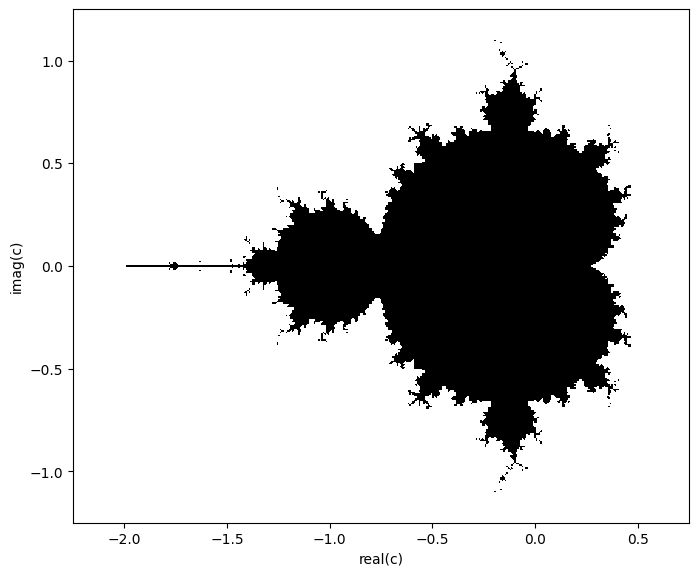

In [81]:
def mandelbrot(x1, y1, width, height, numXPixels, maxIterations):
    
    # Define C, Z and M arrays
    numYPixels = int(numXPixels * height / width)
    X, Y = np.meshgrid(np.linspace(x1, x1 + width, numXPixels), np.linspace(y1 + height, y1, numYPixels))
    C = X + Y * 1j
    Z = np.zeros(C.shape).astype(complex)
    M = np.zeros(C.shape)
    
    # Perform iterations
    for n in range(maxIterations):
        i = np.where(abs(Z) < 2)
        Z[i] = Z[i] ** 2 + C[i]
        M[i] += 1

    # Find the points that are still inside the Mandelbrot set
    M = M == maxIterations
    
    # Plot the Mandelbrot set
    fig, ax = plt.subplots(figsize=(8, 8 * height / width))
    plt.imshow(M, extent=[x1, x1 + width, y1, y1 + height], cmap=cmap)
    plt.xlabel("real(c)")
    plt.ylabel("imag(c)")

    
# Define Mandelbrots set parameters
x1, y1, width, height, numXPixels, maxIterations = -2.25, -1.25, 3, 2.5, 400, 20

# Plot the Mandelbrot set in black and white
cmap = colors.ListedColormap(['white', 'black'])
mandelbrot(x1, y1, width, height, numXPixels, maxIterations)

### Adding colour to the Mandelbrot set

Some numbers which are not members of the Mandelbrot set take longer to escape than others. We can represent this on our Mandelbrot set by plotting each point using a colour which depends on its escape count. Run the program below to plot the Mandelbrot set in colour.

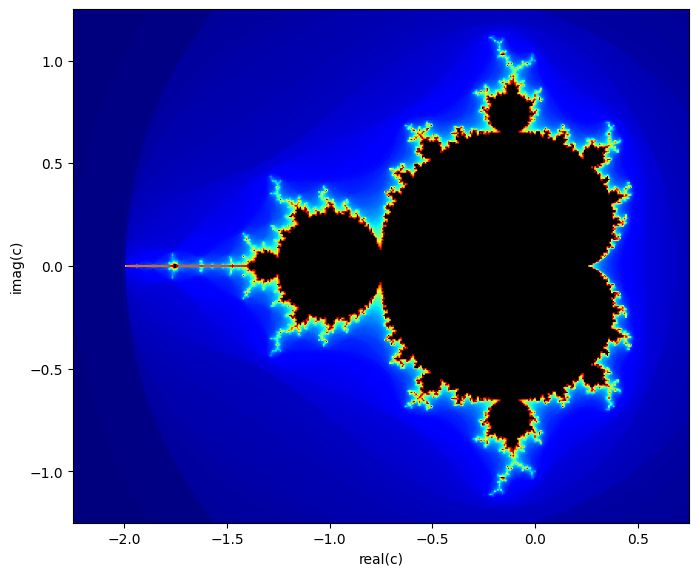

In [50]:
# import matplotlib

def mandelbrot(x1, y1, width, height, numXPixels, maxIterations):
    
    # Define C, Z and M arrays
    numYPixels = int(numXPixels * height / width)
    X, Y = np.meshgrid(np.linspace(x1, x1 + width, numXPixels), np.linspace(y1 + height, y1, numYPixels))
    C = X + Y * 1j
    Z = np.zeros(C.shape).astype(complex)
    M = np.zeros(C.shape)
    
    # Perform iterations
    for n in range(maxIterations):
        i = np.where(abs(Z) < 2)
        Z[i] = Z[i] ** 2 + C[i]
        M[i] += 1
        
    # Smooth out the escape count
    i = np.where(M < maxIterations)
    M[i] += 1 - np.log(np.log2(abs(Z[i])))

    # Plot the Mandelbrot set
    fig, ax = plt.subplots(figsize=(8, 8 * height / width))
    plt.imshow(M, extent=[x1, x1 + width, y1, y1 + height], cmap=cmap)
    plt.xlabel("real(c)")
    plt.ylabel("imag(c)")
    
    
# Define Mandelbrots set parameters
x1, y1, width, height, numXPixels, maxIterations = -2.25, -1.25, 3, 2.5, 400, 40

# Define colormap
jet = matplotlib.colormaps.get_cmap("jet")    # get the colormap
colours = jet(np.linspace(0, 1, 256))         # get the colours from the colormap
colours = np.vstack((colours, [0, 0, 0, 1]))  # add a black layer to the colormap
cmap = colors.ListedColormap(colours)         # save colormap

# Plot the Mandelbrot set
mandelbrot(x1, y1, width, height, numXPixels, maxIterations)

---
### Activity 4: Exploring the Mandelbrot set

The amazing thing about the Mandelbrot set is that when we zoom in to areas surrounding the points in the Mandelbrot set we see that these form complicated and beautiful shapes. There are even small Mandelbrot sets found which we can also zoom into so the Mandelbrot set has the self-similarity property found in other fractals. The code in the code cell below plots the region of the Mandelbrot set defined by bottom-left and top-right co-ordinates (-1.05, 0.25) and (-0.95, 0.35) and calculated for 200 iterations. Explore the Mandelbrot set by changing these values (increase `maxIterations` to get more detail).

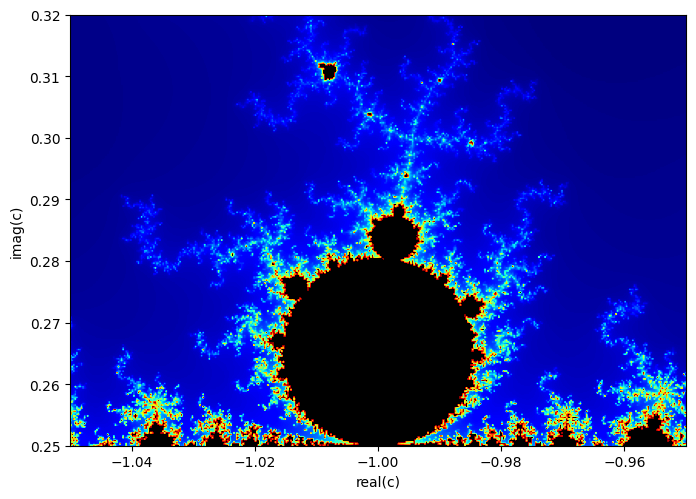

In [51]:
# Plot the mandelbrot set (inputs: x1, y1, width, height, numXPixels, maxIterations)
mandelbrot(-1.05, 0.25, 0.1, 0.07, 400, 300)

### Zooming into the Mandlebrot set

The video below was created by YouTube creator [Maths Town](https://www.youtube.com/channel/UC6qEdtxp_IAaVrNAHUIhHbQ) and zooms into the Mandelbrot set showing the infinite complexity of the fractal.

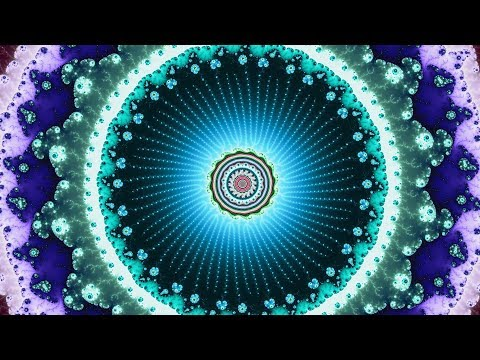

In [54]:
from IPython.display import YouTubeVideo
YouTubeVideo('pCpLWbHVNhk', width=600)

---
## Useful Links

If you would like to further explore Python and fractals you may find the following links useful:

- [Anaconda](https://www.anaconda.com/products/distribution) - a suite of software tools that includes Jupyter Notebook and Python. Download and install on your computer to write and run Jupyter notebooks
- [Google Colab](https://colab.research.google.com/) - run Jupyter notebooks in the cloud using Google Colab (you will need to have a Google account to do this)
- [Fractals](https://en.wikipedia.org/wiki/Fractal)
- [Koch snowflake](https://en.wikipedia.org/wiki/Koch_snowflake)
- [Sierpinski Triangle](https://en.wikipedia.org/wiki/Sierpi%C5%84ski_triangle)
- [Sierpinski carpet](https://en.wikipedia.org/wiki/Sierpi%C5%84ski_carpet)
- [Fractal tree](https://en.wikipedia.org/wiki/Fractal_canopy)
- [Mandelbrot set](https://en.wikipedia.org/wiki/Mandelbrot_set)

&copy; Dr Jon Shiach 2023